In [1]:
!mkdir -p ./figures

# Exponential Landscapes

In [2]:
%matplotlib inline
import os

from leap_ec.probe import FitnessStatsCSVProbe
from leap_ec.contrib import analysis
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

def plot_all(curves_file, pop_size, num_procs, time_col='step', metric_col='bsf', metric_cols=(),
             ylim=(None, None), error=True, ylog=False, modulo=10,
             max_time=float('Inf')):
    assert(os.path.exists(curves_file))
    df = pd.read_csv(curves_file, skipinitialspace=True, comment='#')
    df = df[df[time_col] % modulo == 0]  # Select every nth step
    df = df[df[time_col] < max_time]  # Cut off end of runs
    analyzer = analysis.CurveAnalyzer(df,
                                      time_col=time_col,
                                      experiment_cols=['experiment'],
                                      metric_cols=FitnessStatsCSVProbe.default_metric_cols + metric_cols)
    plotter = analysis.CurvePlotter(analyzer)

    plt.figure(figsize=(12, 6))
    #plt.subplot(131)
    #plotter.plot_curves(metric_col, f"Indiviudal {metric_col} Curves", ylog=ylog, ax=plt.gca())
    plt.subplot(121)
    plotter.plot_avg_curves(metric_col, f"Average {metric_col} Curves", error, ylim, ylog=ylog, ax=plt.gca())
    plt.ylabel("Mean Fitness")
    plt.title(f"BSF at Population Size = {pop_size}, #Processors = {num_procs}")
    plt.subplot(122)
    plotter.plot_scalars_bar(metric_col, title='Area Under Curve', ax=plt.gca())
    plt.xlabel("")
    plt.tight_layout()
    
    return analyzer.scalar_metrics_per_run(metric_col=metric_col)


## Correlated Case

Population size 10:

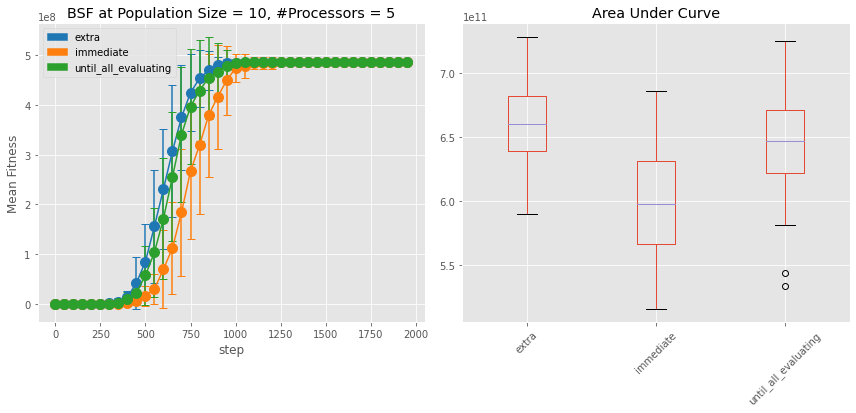

In [3]:
df_auc = plot_all('2021_results/exponential_correlated/curves_combined_popsize10_proc5.csv',
                  pop_size=10, num_procs=5, modulo=50)
plt.savefig('./figures/2022-03_initialization_correlated_n10_t5.pdf', format='pdf')

In [4]:
df_auc.groupby(['experiment']).auc.mean()

experiment
extra                   6.613851e+11
immediate               5.965393e+11
until_all_evaluating    6.445535e+11
Name: auc, dtype: float64

In [5]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'immediate'].auc
)

RanksumsResult(statistic=6.90071369533257, pvalue=5.174192165506797e-12)

In [6]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=2.0888274222635053, pvalue=0.03672326097684372)

In [7]:
stats.ranksums(
    df_auc[df_auc.experiment == 'immediate'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=-5.342710403479263, pvalue=9.156699000019997e-08)

Population size 50:

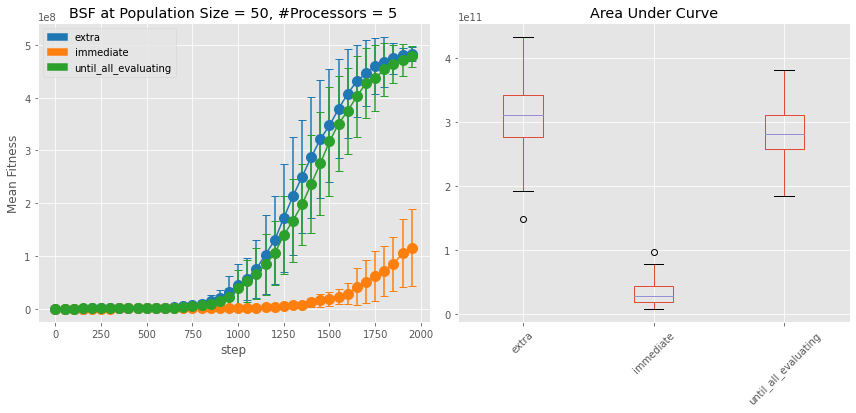

In [8]:
df_auc = plot_all('2021_results/exponential_correlated/curves_combined_popsize50_proc5.csv',
         pop_size=50, num_procs=5, modulo=50)
plt.savefig('./figures/2022-03_initialization_correlated_n50_t5.pdf', format='pdf')

In [9]:
df_auc.groupby(['experiment']).auc.mean()

experiment
extra                   3.061428e+11
immediate               3.272699e+10
until_all_evaluating    2.802180e+11
Name: auc, dtype: float64

In [10]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'immediate'].auc
)

RanksumsResult(statistic=8.617274844321392, pvalue=6.856641447475644e-18)

In [11]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=2.5300318942927604, pvalue=0.011405215859330112)

In [12]:
stats.ranksums(
    df_auc[df_auc.experiment == 'immediate'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=-8.617274844321392, pvalue=6.856641447475644e-18)

## Anti-Correlated Case

Population size 10:

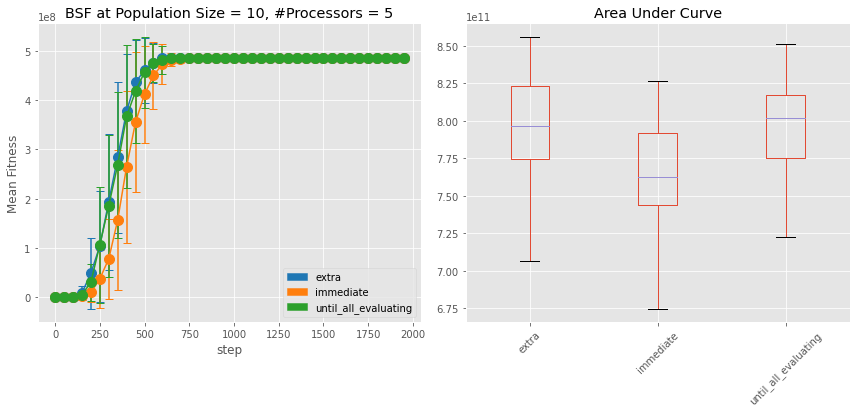

In [13]:
df_auc = plot_all('2021_results/exponential_anticorrelated/curves_combined_popsize10_proc5.csv',
         pop_size=10, num_procs=5, modulo=50)
plt.savefig('./figures/2022-03_initialization_anticorrelated_n10_t5.pdf', format='pdf')

In [14]:
df_auc.groupby(['experiment']).auc.mean()

experiment
extra                   7.986839e+11
immediate               7.667860e+11
until_all_evaluating    7.946166e+11
Name: auc, dtype: float64

In [15]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'immediate'].auc
)

RanksumsResult(statistic=4.439619999794381, pvalue=9.011785556155143e-06)

In [16]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=0.33090335402194143, pvalue=0.7407174884203378)

In [17]:
stats.ranksums(
    df_auc[df_auc.experiment == 'immediate'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=-3.853645310380526, pvalue=0.00011637214474448616)

Population size 50:

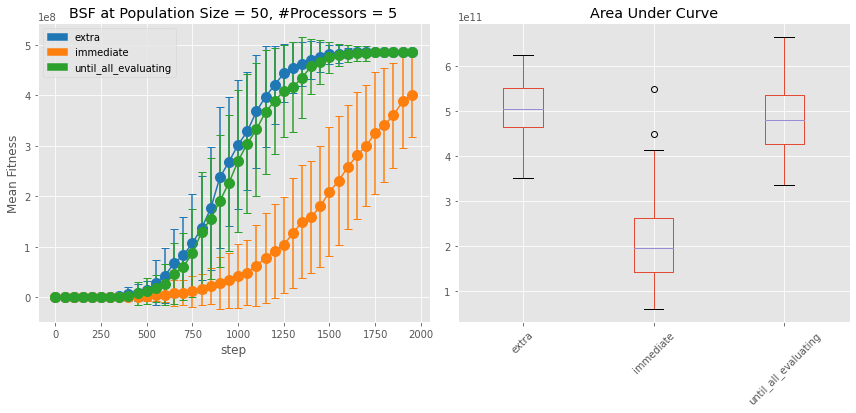

In [18]:
df_auc = plot_all('2021_results/exponential_anticorrelated/curves_combined_popsize50_proc5.csv',
         pop_size=50, num_procs=5, modulo=50)
plt.savefig('./figures/2022-03_initialization_anticorrelated_n50_t5.pdf', format='pdf')

In [19]:
df_auc.groupby(['experiment']).auc.mean()

experiment
extra                   5.074714e+11
immediate               2.144886e+11
until_all_evaluating    4.820881e+11
Name: auc, dtype: float64

In [20]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'immediate'].auc
)

RanksumsResult(statistic=8.265690030673078, pvalue=1.388890058422927e-16)

In [21]:
stats.ranksums(
    df_auc[df_auc.experiment == 'extra'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=1.661410589985164, pvalue=0.09663101235794387)

In [22]:
stats.ranksums(
    df_auc[df_auc.experiment == 'immediate'].auc,
    df_auc[df_auc.experiment == 'until_all_evaluating'].auc
)

RanksumsResult(statistic=-8.107132173537565, pvalue=5.182847295464635e-16)

# Takeover Curves

Population size 10:

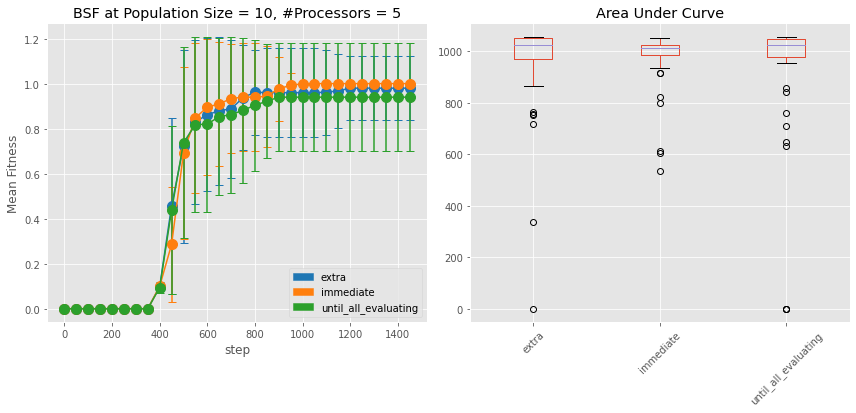

In [23]:
metric_cols = ('mean_eval_time', 'LOW_ratio', 'HIGH_ratio')
df_auc = plot_all('2021_results/flat_takeover/curves_combined_pop10.csv',
         pop_size=10, num_procs=5,
         modulo=50, metric_col='HIGH_ratio', metric_cols=metric_cols, max_time=1500)

Population size 100:

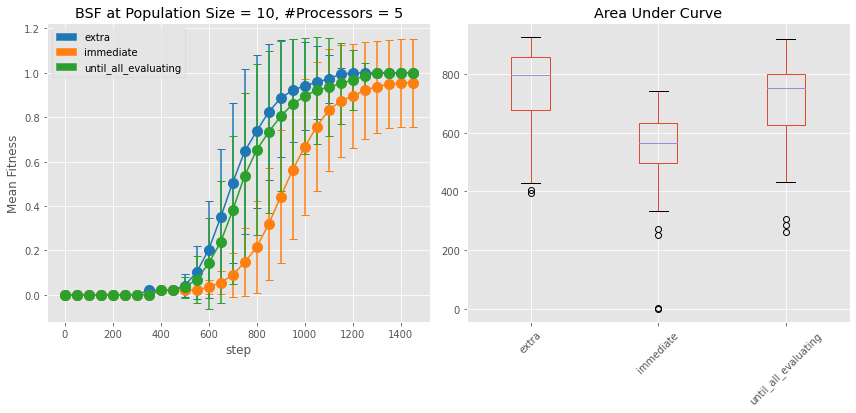

In [24]:
df_auc = plot_all('2021_results/flat_takeover/curves_combined_pop50.csv',
         pop_size=10, num_procs=5,
         modulo=50, metric_col='HIGH_ratio', metric_cols=metric_cols, max_time=1500)